<a href="https://colab.research.google.com/github/umeshnandargi/Pytorch/blob/main/ConvNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Convert MNIST images into tensor of 4 dim (no. of images, ht, width, color channel)

transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root = '/cnn_data', train=True, transform=transform, download= True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 344kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.5MB/s]


In [4]:
test_data = datasets.MNIST(root = '/cnn_data', train=False, transform=transform, download= True)

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = True)

In [7]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [8]:
for i, (x_train, y_train) in enumerate(train_data):
  break

In [9]:
x_train.shape

torch.Size([1, 28, 28])

In [10]:
x = x_train.reshape(1,1,28,28)

In [11]:
x = F.relu(conv1(x))
print(x.shape)
x = F.max_pool2d(x,2,2) # KernelSize = 2, Stride = 2
print(x.shape)
x = F.relu(conv2(x))
print(x.shape)
x = F.max_pool2d(x, 2,2)
print(x.shape)


torch.Size([1, 6, 26, 26])
torch.Size([1, 6, 13, 13])
torch.Size([1, 16, 11, 11])
torch.Size([1, 16, 5, 5])


In [12]:
#Model Class

class CNN(nn.Module):
  def __init__(self) :
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #Fully Connected
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.reshape(-1, 16*5*5)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return F.log_softmax(x, dim=1)


In [13]:
torch.manual_seed(53)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [14]:
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [15]:
# training
import time

start_time = time.time()

epochs = 5
train_losses = []
train_correct = []
test_losses = []
test_correct = []


for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train) #2D Input
    loss = lossfn(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum() # How many pred were correct in this batch
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f'Epoch {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
    for b , (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = lossfn(y_val , y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)




end_time = time.time()
total_time = end_time- start_time
print(f'training took {total_time/60} minutes')

Epoch 0 Batch: 600 Loss: 0.4467589855194092
Epoch 0 Batch: 1200 Loss: 0.0067560188472270966
Epoch 0 Batch: 1800 Loss: 0.05312969535589218
Epoch 0 Batch: 2400 Loss: 0.01864239200949669
Epoch 0 Batch: 3000 Loss: 0.07697182148694992
Epoch 0 Batch: 3600 Loss: 0.5511499047279358
Epoch 0 Batch: 4200 Loss: 0.2552184462547302
Epoch 0 Batch: 4800 Loss: 0.046357087790966034
Epoch 0 Batch: 5400 Loss: 0.08545036613941193
Epoch 0 Batch: 6000 Loss: 0.49656885862350464
Epoch 1 Batch: 600 Loss: 0.03558666259050369
Epoch 1 Batch: 1200 Loss: 0.7972050905227661
Epoch 1 Batch: 1800 Loss: 0.02165612019598484
Epoch 1 Batch: 2400 Loss: 0.000194694017409347
Epoch 1 Batch: 3000 Loss: 0.319419801235199
Epoch 1 Batch: 3600 Loss: 0.01226833462715149
Epoch 1 Batch: 4200 Loss: 0.02707323431968689
Epoch 1 Batch: 4800 Loss: 0.023878592997789383
Epoch 1 Batch: 5400 Loss: 0.03379514440894127
Epoch 1 Batch: 6000 Loss: 0.4123879075050354
Epoch 2 Batch: 600 Loss: 0.15243789553642273
Epoch 2 Batch: 1200 Loss: 0.00412137480

In [16]:
with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
  for b , (X_test, y_test) in enumerate(test_loader):
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    break

Prediction : tensor([7])


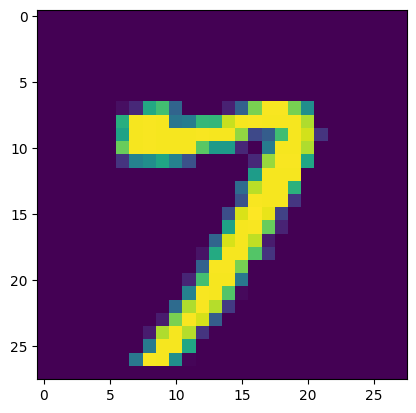

In [33]:
trial = X_test[9]
x = trial.view(1,1,28,28)
pred = model(x)
predicted = torch.max(pred.data, 1)[1]
print(f'Prediction : {predicted}')
plt.imshow(x.reshape(28,28))

In [18]:
test_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [29]:
with torch.no_grad():
  correct = 0
  for x_test, y_test in test_everything:
    y_val = model(x_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()
accuracy = (correct.item()/len(test_data))*100
print(f'Accuracy of the model is : {accuracy} %')

Accuracy of the model is : 96.81 %


Prediction : tensor([0])


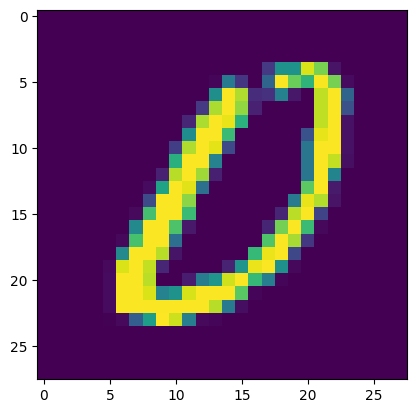

In [66]:
trial = test_data[5257][0]
x = trial.view(1,1,28,28)
with torch.no_grad():
  pred = model(x)
predicted = torch.max(pred.data, 1)[1]
print(f'Prediction : {predicted}')
plt.imshow(x.reshape(28,28))